In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def f(x):
    return 3*x**2 - 4*x + 5

In [4]:
f(10)

265

In [10]:
xs = np.arange(-5, 7, 0.25)
xs

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,
        6.25,  6.5 ,  6.75])

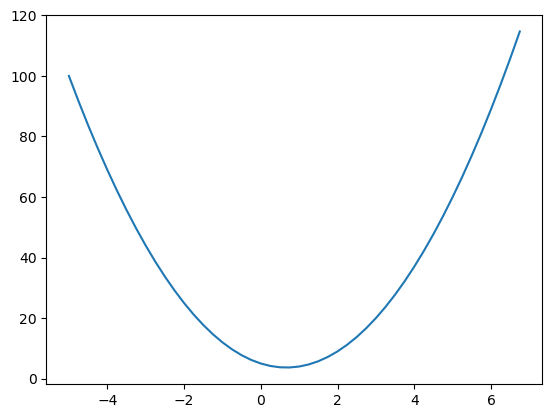

In [9]:

ys = f(xs)
plt.plot(xs, ys)

In [11]:
### Finding slope (dy/dx) or (df/dx) --> (f(x + h) - f(x))/h , where h tends to 0

h = 0.000001
x = 2/3
(f(x + h) - f(x))/h ## Ans ~ 0 (minima in our graph)

2.999378523327323e-06

In [12]:
## More complex problems and their gradients

a = 2.0
b = -3.0
c = 10.0
d = a*b + c # d is a function with 3 variables or inputs
print(d)

4.0


In [16]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

f = a*b + c

### To get df/dc ---> (f(a,b,c+h) - f(a,b,c)) / h will be 1, 
### ie. for any change in 'c' the same change is observed in f

c += h
f2 = a*b + c

print('f', f)
print('f2', f2)
print('slope', (f2 - f)/h)

f 4.0
f2 4.0001
slope 0.9999999999976694


In [18]:
# inputs
a = 2.0
b = -3.0
c = 10.0

f = a*b + c

### To get df/db ---> (f(a,b+h,c) - f(a,b,c)) / h will be a because of the multiplication(*)
b += h
f2 = a*b + c

print('f', f)
print('f2', f2)
print('slope', (f2 - f)/h)

f 4.0
f2 4.0002
slope 2.0000000000042206


In [19]:
# inputs
a = 2.0
b = -3.0
c = 10.0

f = a*b + c

### To get df/da ---> (f(a+h,b,c) - f(a,b,c)) / h ----> will be b
a += h
f2 = a*b + c

print('f', f)
print('f2', f2)
print('slope', (f2 - f)/h)

f 4.0
f2 3.999699999999999
slope -3.000000000010772


In [36]:
class Value:
  
    def __init__(self, data):
        self.data = data

# the output when a class object is called without using __repr__ function

a = Value(2)

print(a) # calling a class object

print() # for new empty line
print(f"a = {a.data}")


a = 2


In [47]:
## Simple class
class Value:
  
    def __init__(self, data):
        self.data = data
        
    def __repr__(self):
        return f"Value(data={self.data})" # Used to print the value of object, when the object is called
    
    def __add__(self, other):
        out = Value(self.data + other.data)
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data)
        return out
    
  
    
a = Value(2)
print(a) ## due to __repr__ function 
b = Value(-3.0)

print(a+b) ## Note a+b is same as a.__add__(b), where a is self and b is other

c = Value(10)

a*b + c ## is same as (a.__mul__(b)).__add__(c)


Value(data=2)
Value(data=-1.0)


Value(data=4.0)

In [74]:
## To create a graph and trace the value of what values gives rise to what values, we need to point or 
## save the # children and the operations performed
## Adding label to visualize in graph

class Value:
  
    def __init__(self, data, _children=(), _op="", label=""): # initially the children is empty tuple
        self.data = data
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # Used to print the value of object, when the object is called
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other),"+") # (self,other) is the tuple to define children
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other),"*")
        return out
    


a = Value(2, label="a")
b = Value(-3.0, label='b')
c = Value(10, label='c')

d = a*b
print(d)
print(d._prev)
print(d._op)
d.label = 'd'

print()

f = d + c; f.label='f'
print(f)
print(f._prev)
print(f._op)



Value(data=-6.0)
{Value(data=2), Value(data=-3.0)}
*

Value(data=4.0)
{Value(data=-6.0), Value(data=10)}
+


In [59]:
! pip install graphviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.0 MB/s eta 0:00:00


In [76]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    #print(nodes, edges)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f}" % (n.label, n.data, ), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

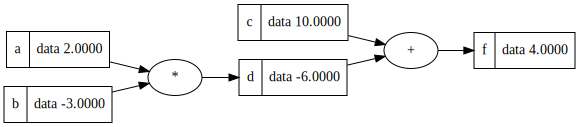

In [77]:
draw_dot(f)

In [120]:
### Now lets calculate gradients ie. df/dx, where in neural nets f will be loss function and x will be weights
### gradients are calculated using backward functions

import math
class Value:
  
    def __init__(self, data, _children=(), _op="", label=""): # initially the children is empty tuple
        self.data = data
        
        self.grad = 0 # Initialised to zero -> change in this data does not impact the function, will be updated later
        self._backward = lambda: None # defining an empty function for leaf nodes
        
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # Used to print the value of object, when the object is called
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other),"+") # (self,other) is the tuple to define children
        
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        
        out._backward = _backward # using backward propagation get the gradient of children nodes
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other),"*")
        def _backward():
            self.grad = other.data * out.grad # chain rule
            other.grad = self.data * out.grad
            
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)    # tanh definition
        out = Value(t, (self, ), 'tanh')   # 'tanh' is the operation (_op)
        
        def _backward():
            self.grad = (1 - t**2) * out.grad # d(tanh) = 1 - tanh**2
        
        out._backward = _backward
        return out

    
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

In [79]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
        if n._op:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._op, label = n._op)
            # and connect this node to it
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

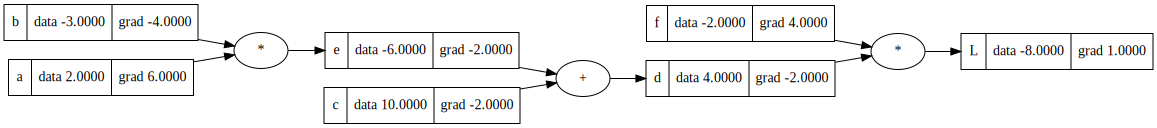

In [87]:
draw_dot(L)

In [85]:
## To find gradients dL/dx manually
def lol():
  
    h = 0.001
  
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L1 = L.data
  
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    
    c = Value(10.0, label='c')
    e = a*b; e.label = 'e'
    e.data += h
    d = e + c; d.label = 'd'
    f = Value(-2.0, label='f')
    L = d * f; L.label = 'L'
    L2 = L.data
  
    print((L2 - L1)/h)
    
lol()

-2.000000000000668


In [97]:
# Manually assigning the gradient values from chain rule and differentiation

L.grad = 1
f.grad = 4    ## i.e. d.data
d.grad = -2.  ## i.e. f.data
c.grad = -2   ## i.e. d.grad(chain rule)
e.grad = -2
a.grad = 6    ## i.e. b.data(de/da) * e.grad(dL/de) --->dL/da (chain rule)
b.grad = -4


In [91]:
a.data = 2
a.data += 0.01 * a.grad
# b.data += 0.01 * b.grad
# c.data += 0.01 * c.grad
# f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(a.data, L.data)

2.06 -7.640000000000001


In [98]:
a.data = 2
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-7.286496


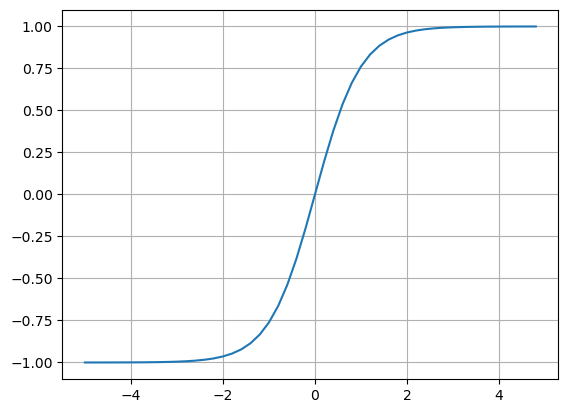

In [99]:
# Activation functions are squashing function
# tanh is an activation function
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

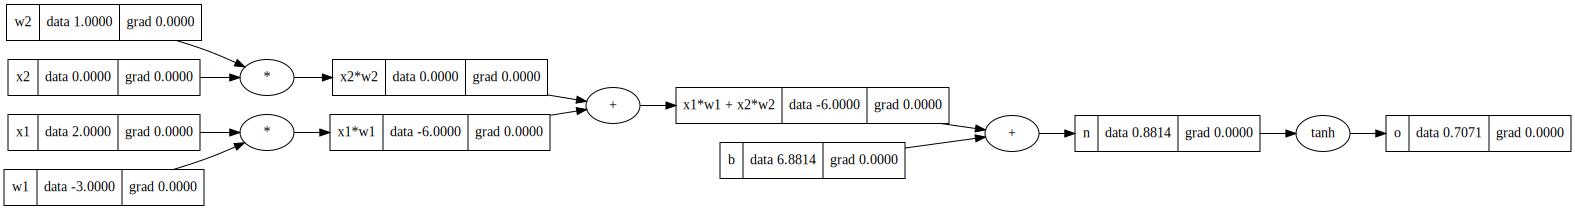

In [121]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

draw_dot(o)

In [ ]:
# o = tanh(n)
# do/dn = 1 - o**2 ---> (1 - (tanh)^2)

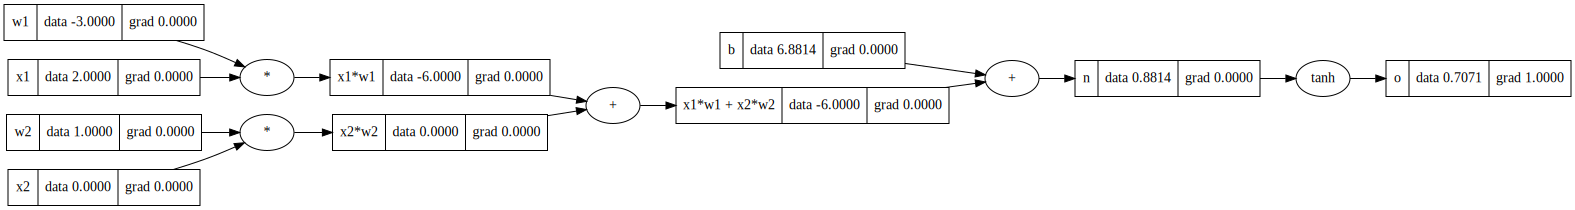

In [110]:
o.grad = 1
draw_dot(o)

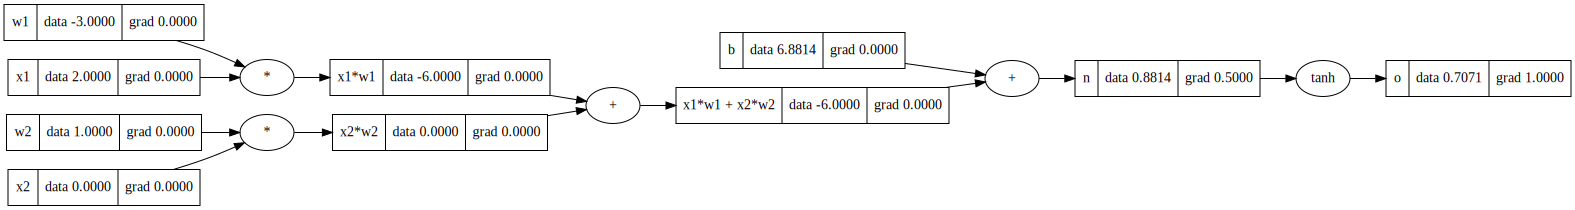

In [111]:
o._backward()
draw_dot(o)

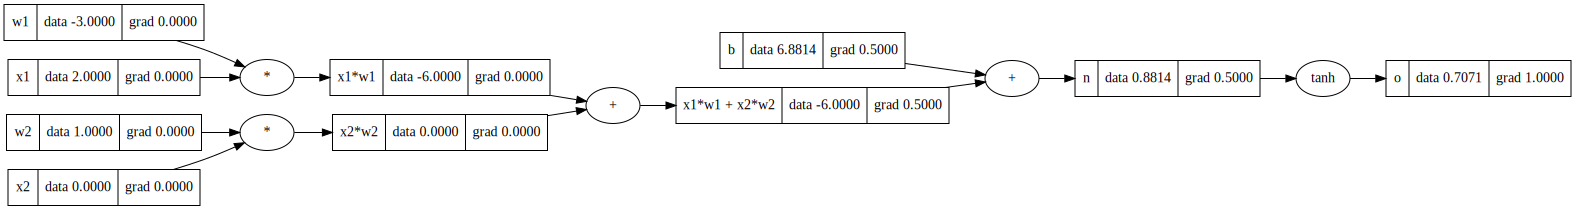

In [113]:
n._backward() # will get the gradient of children node
draw_dot(o)

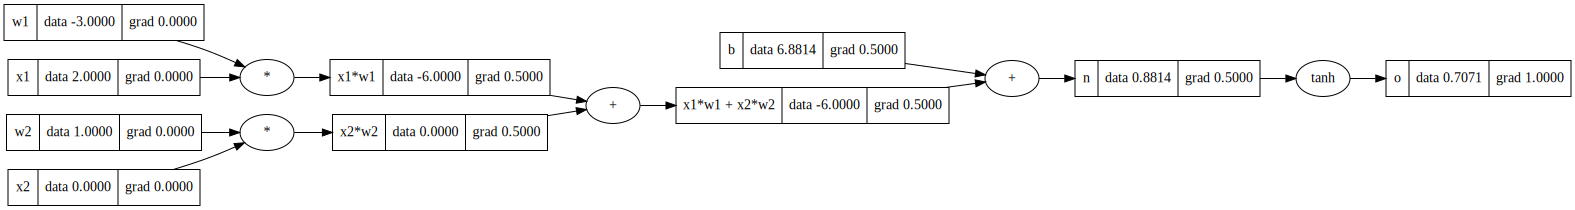

In [114]:
x1w1x2w2._backward() 
draw_dot(o)

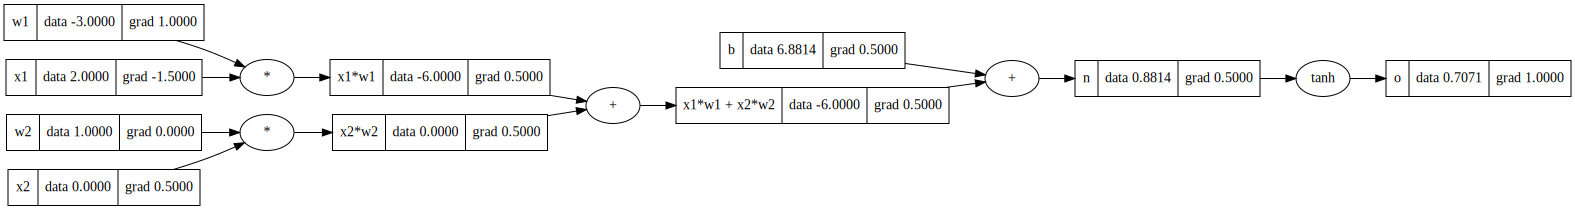

In [116]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [122]:
# We wanted to order the manual backpropagation in a topological order or list from left to right

o.grad = 1.0

# Function to get topological order
topo = []
visited = set()
def build_topo(v):
    if v not in visited:
        visited.add(v)
        for child in v._prev:
            build_topo(child)
        topo.append(v)
build_topo(o)

topo
    

[Value(data=6.881373587019543),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

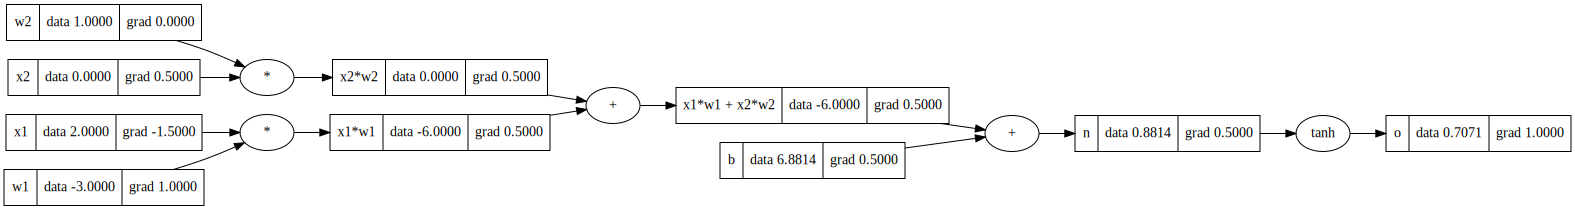

In [123]:
# performing back propagation in reversed topological order

for node in reversed(topo):
    node._backward()
draw_dot(o)  

In [132]:
## Updating the class with backward propagation with topological sort

class Value:
  
    def __init__(self, data, _children=(), _op="", label=""): # initially the children is empty tuple
        self.data = data
        
        self.grad = 0 # Initialised to zero -> change in this data does not impact the function, will be updated later
        self._backward = lambda: None # defining an empty function for leaf nodes
        
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # Used to print the value of object, when the object is called
    
    def __add__(self, other):
        out = Value(self.data + other.data, (self,other),"+") # (self,other) is the tuple to define children
        
        def _backward():
            self.grad = 1 * out.grad
            other.grad = 1 * out.grad
        
        out._backward = _backward # using backward propagation get the gradient of children nodes
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self,other),"*")
        def _backward():
            self.grad = other.data * out.grad # chain rule
            other.grad = self.data * out.grad
            
        out._backward = _backward
        return out
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)    # tanh definition
        out = Value(t, (self, ), 'tanh')   # 'tanh' is the operation (_op)
        
        def _backward():
            self.grad = (1 - t**2) * out.grad # d(tanh) = 1 - tanh**2
        
        out._backward = _backward
        return out
    
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()  # note the underscore in the function to get gradients of children
        

    


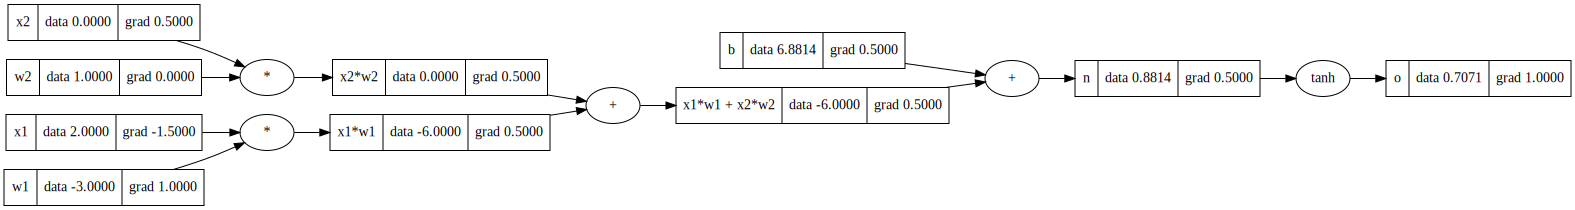

In [133]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()
draw_dot(o)

### bug in the above code of Value class

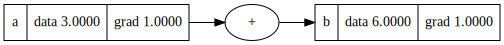

In [134]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

## Note now the value of a.grad is wrong, since db/da = d(2a)/da = 2,
## but our class overwrites the a.grad instead of updating

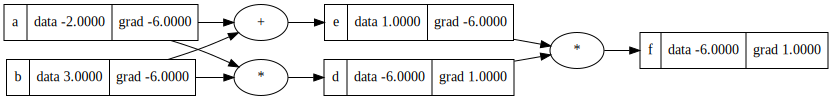

In [135]:
### Another example to show the bug

a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [147]:
### Corrected code

## Updating the class with backward propagation with topological sort

class Value:
  
    def __init__(self, data, _children=(), _op="", label=""): # initially the children is empty tuple
        self.data = data
        
        self.grad = 0 # Initialised to zero -> change in this data does not impact the function, will be updated later
        self._backward = lambda: None # defining an empty function for leaf nodes
        
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f"Value(data={self.data})" # Used to print the value of object, when the object is called
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other) # so that a=Value(2); a+1 will work, otherwise error
        out = Value(self.data + other.data, (self,other),"+") # (self,other) is the tuple to define children
        
        def _backward():
            self.grad += 1 * out.grad
            other.grad += 1 * out.grad
        
        out._backward = _backward # using backward propagation get the gradient of children nodes
        return out
    
    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self,other),"*")
        def _backward():
            self.grad += other.data * out.grad # chain rule
            other.grad += self.data * out.grad
            
        out._backward = _backward
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():
            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward
        
        return out
    
    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)
    
    def __rmul__(self, other): # other * self # to reverse the order, as 2*a will not work, but a*2
        return self * other
    
    def __radd__(self, other): # other + self
        return self + other
    
    def __truediv__(self, other): # self / other
        return self * other**-1

    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)    # tanh definition
        out = Value(t, (self, ), 'tanh')   # 'tanh' is the operation (_op)
        
        def _backward():
            self.grad += (1 - t**2) * out.grad # d(tanh) = 1 - tanh**2
        
        out._backward = _backward
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
    
        def _backward():
            self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
        out._backward = _backward
    
        return out

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()  # note the underscore in the function to get gradients of children
        

    

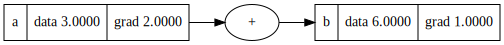

In [137]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'

b.backward()
draw_dot(b)



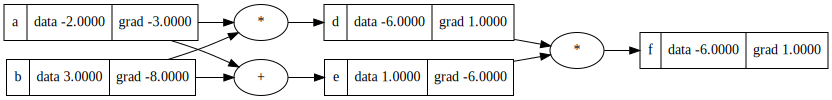

In [138]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

In [148]:
## After updating power, exponential and division in the class

a = Value(2)
b = Value(4)
a/b


Value(data=0.5)

In [142]:
a**b

# note the error message

AssertionError: only supporting int/float powers for now

In [149]:
a-b

Value(data=-2)

In [150]:
-b

Value(data=-4)

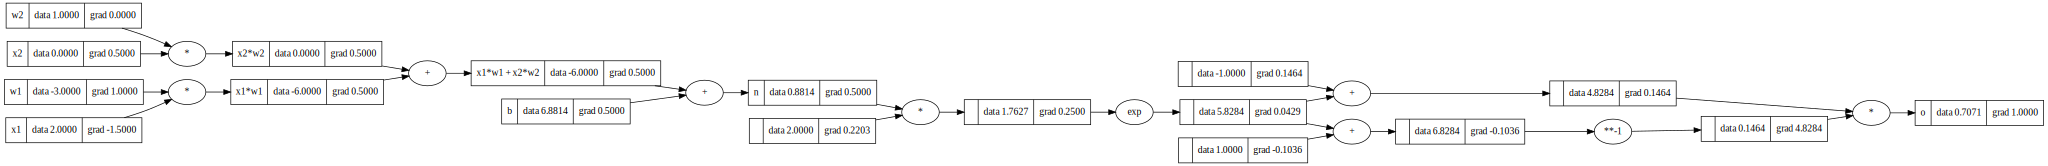

In [151]:
### Here we expand tanh


# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- ## Expansion of tanh
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

## Using pytorch

In [152]:
import torch

In [162]:
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True     # by default every tensor is single precision 
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True     # so convert to double precision by .double()
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True     # tensors will have no gradient,
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True      # so should activate .requires_grad to be true
n = x1*w1 + x2*w2 + b                                                          # you can only change requires_grad flags for leaf variables.
o = torch.tanh(n)

print(o.data.item())          # checking for forward pass with the above Value class
o.backward()

print('---')
print('x2', x2.grad.item())   # checking for backward propagation
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [154]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [158]:
o.item()

0.7071066904050358

In [159]:
b.grad.item()

0.5000001283844369

In [164]:
import random


class Neuron:
    def __init__(self, nin):                                         # constructor - nin ---> no. of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]   # Weights for each input
        self.b = Value(random.uniform(-1,1))                         # Bias
        
    def __call__(self,x):         # executes when the object of a class is called --- n(x)
        return 0.0

x = [2.0, 3, 4]
n = Neuron(3) # no. of inputs (nin)
n(x)

0.0

In [172]:
class Neuron:
    def __init__(self, nin):                                         # constructor - nin ---> no. of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]   # Weights for each input
        self.b = Value(random.uniform(-1,1))                         # Bias
        
    def __call__(self,x):                                     # executes when the object of a class is called --- n(x)
        # w * x + b                                           # Forward pass
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b) # Activation
        out = np.tanh(act)
        return out
 

x = [2.0, 3, 4]
n = Neuron(3) # no. of inputs (nin)
n(x)

Value(data=0.9995103522709969)

In [177]:
class Neuron:
    def __init__(self, nin):                                         # constructor - nin ---> no. of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]   # Weights for each input
        self.b = Value(random.uniform(-1,1))                         # Bias
        
    def __call__(self,x):                                     # executes when the object of a class is called --- n(x)
        # w * x + b                                           # Forward pass
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b) # Activation
        out = np.tanh(act)
        return out
    
class Layer:
    def __init__(self, nin, nout):          # constructor: nin - no of inputs, nout - no. of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)] # list of neurons
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]               # Forward pass for each neuron in the list
        return outs[0] if len(outs) == 1 else outs
 

x = [2.0, 3, 4]
n = Layer(3,3) # no. of inputs (nin), no of neurons(nout)
n(x)

[Value(data=0.8827477166288435),
 Value(data=0.05872751896917557),
 Value(data=0.9236674870075244)]

In [190]:
class Neuron:
    def __init__(self, nin):                                         # constructor - nin ---> no. of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]   # Weights for each input
        self.b = Value(random.uniform(-1,1))                         # Bias
        
    def __call__(self,x):                                     # executes when the object of a class is called --- n(x)
        # w * x + b                                           # Forward pass
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b) # Activation
        out = np.tanh(act)
        return out
    
class Layer:
    def __init__(self, nin, nout):          # constructor: nin - no of inputs, nout - no. of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)] # list of neurons
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]               # Forward pass for each neuron in the list
        return outs[0] if len(outs) == 1 else outs

class MLP:                            # Multilayer Perceptron
    def __init__(self, nin, nouts):   # constructor: nin - no. of inputs, nouts - list of no. of neurons in each layer
        sz = [nin] + nouts
        self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
            #print(x)
        return x
    
x = [2.0, 3, 4]
n = MLP(3,[4, 4, 1]) 
n(x)

Value(data=0.937849701713414)

In [ ]:
draw_dot(n(x))

In [184]:
# Small dataset
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [198]:
## Predictions
ypred = [n(x) for x in xs] # finding predictions using forward pass - for the weights initialized for n(x) during MLP 
ypred

[Value(data=0.9213332312992348),
 Value(data=0.3623875429502141),
 Value(data=0.9302694478269058),
 Value(data=0.597673201936286)]

In [206]:
## Loss
sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))

Value(data=5.750095271337929)

In [235]:
## Defining parameters in the class to train the model

class Neuron:
    def __init__(self, nin):                                         # constructor - nin ---> no. of inputs
        self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]   # Weights for each input
        self.b = Value(random.uniform(-1,1))                         # Bias
        
    def __call__(self,x):                                     # executes when the object of a class is called --- n(x)
        # w * x + b                                           # Forward pass
        act = sum((wi*xi for wi,xi in zip(self.w,x)), self.b) # Activation
        out = np.tanh(act)
        return out
    
    def parameters(self):
        return self.w + [self.b]            # List of parameters: weights and bias
    
class Layer:
    def __init__(self, nin, nout):          # constructor: nin - no of inputs, nout - no. of neurons in the layer
        self.neurons = [Neuron(nin) for _ in range(nout)] # list of neurons
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]               # Forward pass for each neuron in the list
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:                            # Multilayer Perceptron
    def __init__(self, nin, nouts):   # constructor: nin - no. of inputs, nouts - list of no. of neurons in each layer
        sz = [nin] + nouts
        self.layers = [Layer(sz[i],sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
            #print(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

In [242]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
loss

Value(data=5.750095271337929)

In [243]:
loss.backward() # backward propagation from loss to obtain gradients

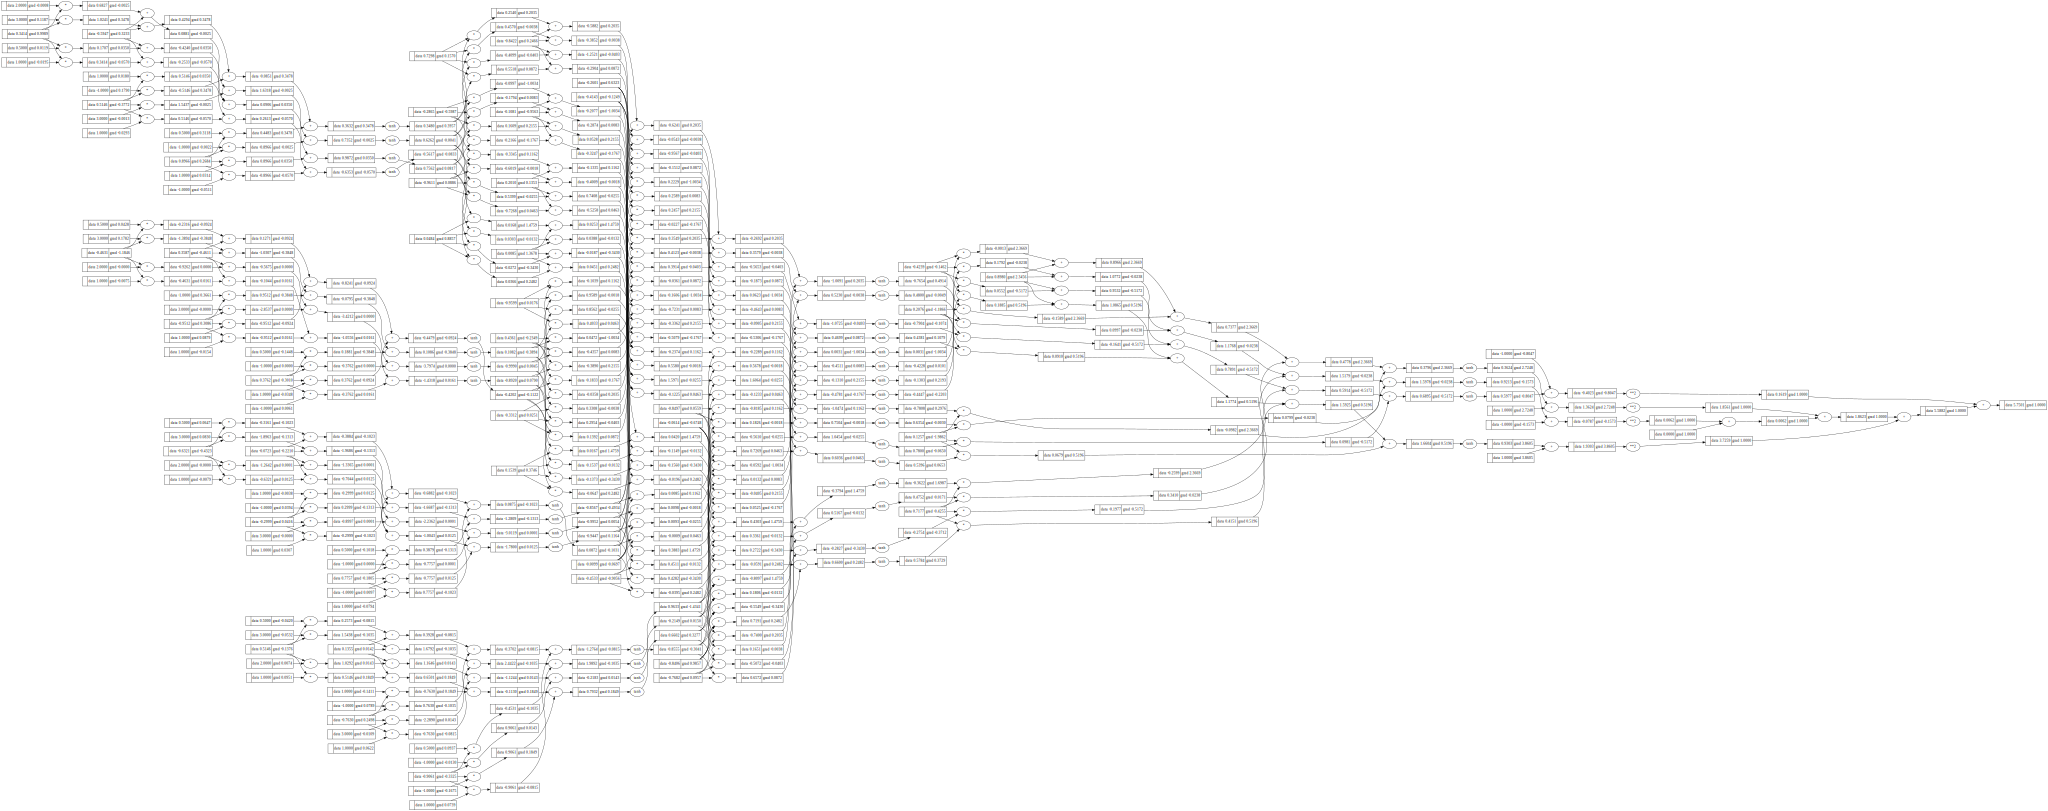

In [211]:
draw_dot(loss)

In [236]:
x = [2.0, 3, 4]
n = MLP(3,[4, 4, 1]) 
n(x)

Value(data=-0.720135645375929)

In [238]:
n.parameters()

[Value(data=-0.48536596582084734),
 Value(data=-0.42467847508468815),
 Value(data=0.9276645484922488),
 Value(data=0.9370760363726698),
 Value(data=0.3889687470401151),
 Value(data=0.24676709947246134),
 Value(data=-0.4792261252375747),
 Value(data=0.7342571781146072),
 Value(data=-0.7031303695513256),
 Value(data=-0.8371960887243366),
 Value(data=0.059533343747564915),
 Value(data=0.07225008642728015),
 Value(data=-0.5046510055074069),
 Value(data=0.5430813889494503),
 Value(data=0.8337560441775433),
 Value(data=0.5707342690298585),
 Value(data=0.14637246963382622),
 Value(data=-0.4456164237319693),
 Value(data=-0.46462013699724514),
 Value(data=0.38015897125543985),
 Value(data=-0.109515551460164),
 Value(data=-0.4820423014345865),
 Value(data=-0.3807540072771507),
 Value(data=0.3126420670076715),
 Value(data=-0.24964981305355205),
 Value(data=0.2557370496388629),
 Value(data=0.5259858197980816),
 Value(data=0.6881235408226789),
 Value(data=0.9345924429518131),
 Value(data=-0.9240811

In [244]:
len(n.parameters())

41

In [246]:
# Small dataset
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [247]:
## Predictions
ypred = [n(x) for x in xs] # finding predictions using forward pass - for the weights initialized for n(x) during MLP 
ypred

[Value(data=-0.32878775764709245),
 Value(data=-0.5480539289757971),
 Value(data=-0.6918636777852093),
 Value(data=-0.36878314529411305)]

In [248]:
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
loss

Value(data=3.938447447896304)

In [286]:
loss.backward()

In [250]:
len(n.parameters())

41

In [251]:
n.layers[0].neurons[0].w, n.layers[0].neurons[0].b # weights and bias of 1st neuron

([Value(data=-0.48536596582084734),
  Value(data=-0.42467847508468815),
  Value(data=0.9276645484922488)],
 Value(data=0.9370760363726698))

In [252]:
[w.grad for w in n.layers[0].neurons[0].w]  # gradients of weights of 1st neuron 
                                            # showing the influence of weights over loss




[0.20701804744464752, 0.4810523980797605, -0.4556173835576986]

In [287]:
## Gradient descent to minimise the loss

for p in n.parameters():
    print(p, p.grad)
    p.data += -0.01 * p.grad # change the parameter with step size of 0.01 in the opposite direction of gradient to reduce the loss
    print(p, p.grad)         # learning rate 0.01


Value(data=-0.3205663136771724) -8.622455141555841
Value(data=-0.23434176226161402) -8.622455141555841
Value(data=-0.5348163535053257) 2.000253764926246
Value(data=-0.5548188911545882) 2.000253764926246
Value(data=1.0631700526317496) -4.4996511216777115
Value(data=1.1081665638485267) -4.4996511216777115
Value(data=0.9777094610728324) -3.889252371766662
Value(data=1.016601984790499) -3.889252371766662
Value(data=0.38924388942522353) 0.6363357499962232
Value(data=0.3828805319252613) 0.6363357499962232
Value(data=0.2160474361320215) 1.4892243282111153
Value(data=0.20115519284991035) 1.4892243282111153
Value(data=-0.5011225323943493) 1.4043900095011133
Value(data=-0.5151664324893604) 1.4043900095011133
Value(data=0.7104256089995643) 1.4565679195166
Value(data=0.6958599298043983) 1.4565679195166
Value(data=-0.692408732193593) -1.8628161151377507
Value(data=-0.6737805710422154) -1.8628161151377507
Value(data=-0.8416870913411212) -0.24977498670485304
Value(data=-0.8391893414740726) -0.2497749

In [267]:
n.layers[0].neurons[0].w, n.layers[0].neurons[0].b # weights and bias of 1st neuron

([Value(data=-0.48950632676974026),
  Value(data=-0.4342995230462834),
  Value(data=0.9367768961634027)],
 Value(data=0.9309698595809033))

In [288]:
## Predictions
ypred = [n(x) for x in xs] # finding predictions using forward pass - for the new weights of 1 step with gradient descent
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
loss

Value(data=0.21721891306141974)

In [290]:
ypred

[Value(data=0.9395928805534146),
 Value(data=-0.8121954374638142),
 Value(data=-0.5897163511869019),
 Value(data=0.9001668051758936)]

### Full implementation of neural network

In [291]:
### Dataset
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [296]:
# Defining the neural network
n = MLP(3,[4, 4, 1]) 

for k in range(20):
    
    # Forward Pass
    
    ypred = [n(x) for x in xs] # finding predictions using forward pass - for the new weights of 1 step with gradient descent
    loss = sum((yout - ygt)**2 for ygt, yout in zip(ys,ypred))
    
    # Backward Pass
    for p in n.parameters():
        p.grad =0.0            # reset the gradient to zero
    
    loss.backward()
    
    # Gradient Descent
    learning_rate = 0.05
    
    for p in n.parameters():
        p.data += -0.01 * p.grad 
        
    print(k, loss.data)
    
    

0 4.847465935873673
1 4.34522347442187
2 3.3833234494362223
3 2.191925157478337
4 1.208980258014662
5 0.6527969521032176
6 0.37845086303219166
7 0.22835196561557003
8 0.13723247352719078
9 0.08093870425440491
10 0.04696530752393484
11 0.02704037339635057
12 0.015599714328026676
13 0.009103901472367096
14 0.0054231112640367955
15 0.0033261465924988437
16 0.0021188723254962996
17 0.001415167366227186
18 0.0010016677804916994
19 0.0007615594096242071


In [297]:
ypred

[Value(data=0.9866659618106484),
 Value(data=-0.9965975695515449),
 Value(data=-0.9987472576281495),
 Value(data=0.9761124103605593)]